In [40]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
# Figures parameters
sns.set()
plt.style.use('seaborn-whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

In [42]:
# Import Datasets

data_customers = pd.read_csv('olist_customers_dataset.csv', low_memory=False)
print(f'data_customers: {data_customers.shape}')

data_geolocation = pd.read_csv('olist_geolocation_dataset.csv', low_memory=False)
print(f'data_geolocation: {data_geolocation.shape}')

data_order_items = pd.read_csv('olist_order_items_dataset.csv', low_memory=False)
print(f'data_order_items: {data_order_items.shape}')

data_order_payments = pd.read_csv('olist_order_payments_dataset.csv', low_memory=False)
print(f'data_order_payments: {data_order_payments.shape}')

data_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', low_memory=False)
print(f'data_order_reviews: {data_order_reviews.shape}')

data_orders_dataset = pd.read_csv('olist_orders_dataset.csv', low_memory=False)
print(f'data_orders_dataset: {data_orders_dataset.shape}')

data_products_dataset = pd.read_csv('olist_products_dataset.csv', low_memory=False)
print(f'data_products_dataset: {data_products_dataset.shape}')

data_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv', low_memory=False)
print(f'data_sellers_dataset: {data_sellers_dataset.shape}')

data_product_translation = pd.read_csv('product_category_name_translation.csv', low_memory=False)
print(f'data_product_translation: {data_product_translation.shape}')

data_customers: (99441, 5)
data_geolocation: (1000163, 5)
data_order_items: (112650, 7)
data_order_payments: (103886, 5)
data_order_reviews: (100000, 7)
data_orders_dataset: (99441, 8)
data_products_dataset: (32951, 9)
data_sellers_dataset: (3095, 4)
data_product_translation: (71, 2)


In [43]:
print(len(data_orders_dataset['customer_id'].unique()) == len(data_orders_dataset)) # there's one identifier for each row
print(len(data_customers['customer_id'].unique()) == len(data_customers)) # there's one identifier for each row

data = pd.merge(data_customers, data_orders_dataset, on=['customer_id'], how='left') #merge both dataframe on 'customer_id'
data.shape

True
True


(99441, 12)

In [44]:
print(len(data['order_id'].unique())==len(data))# there's one identifier for each row
print(len(data_order_items['order_id'].unique())==len(data_order_items))# there's Not one identifier for each row

# Let's look at the lines that have the same 'order_id'
data_order_items['frequences'] = data_order_items['order_id'].map(data_order_items['order_id'].value_counts())
data_order_items.sort_values(by=['frequences', 'order_id'], ascending=False).head(50)
        # 'order_item_id' : sequential number identifying number of items included in the same order.
        # order_item_id shows that the duplicate series can be summarized by the last line 
        # which shows how many items were bought by the same person at the same date.
        # So I will keep the last line of each duplicate group.

True
False


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,frequences
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,21
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,21
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,21
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,21
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,21
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,21
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,21
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,21
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,21
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,21


In [45]:
# Let's delete the duplicates, leaving each time the last line of the duplicates
data_order_items = data_order_items.sort_values(by=['frequences', 'order_id'], ascending=False).drop_duplicates(
    'order_id', keep='last').drop('frequences', axis=1)

print(len(data_order_items['order_id'].unique())==len(data_order_items))# True there's one identifier for each row
data_order_items.shape

# merge data and data_order_items
data = pd.merge(data_order_items, data,  on=['order_id'], how='left')
data.shape

True


(98666, 18)

In [46]:
print(len(data_order_payments['order_id'].unique())==len(data_order_payments))# there's Not one identifier for each row

# Let's look at the rows that have the same 'order_id'
data_order_payments['frequences'] = data_order_payments['order_id'].map(data_order_payments['order_id'].value_counts())
data_order_payments.sort_values(by=['frequences', 'payment_sequential'], ascending=False).iloc[0:50,:]

False


,order_id,payment_sequential,payment_type,payment_installments,payment_value,frequences
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26,29
39111,fa65dad1b0e818e3ccc5cb0e39231352,28,voucher,1,29.05,29
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02,29
79587,fa65dad1b0e818e3ccc5cb0e39231352,26,voucher,1,28.27,29
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68,29
99213,fa65dad1b0e818e3ccc5cb0e39231352,24,voucher,1,0.42,29
85166,fa65dad1b0e818e3ccc5cb0e39231352,23,voucher,1,18.86,29
100606,fa65dad1b0e818e3ccc5cb0e39231352,22,voucher,1,4.03,29
74239,fa65dad1b0e818e3ccc5cb0e39231352,21,voucher,1,4.11,29
93337,fa65dad1b0e818e3ccc5cb0e39231352,20,voucher,1,150.00,29


In [47]:
# here they give us the price of each item in the basket. 
# For 'payment value' I will sum the price of all the items.

df = data_order_payments.groupby('order_id').sum()
df = df.rename_axis('index').reset_index().drop(['payment_sequential', 'payment_installments', 'frequences'], axis=1)
df.rename(columns = {'index': 'order_id', 'payment_value': 'payment_value2'}, inplace = True)

# merge df and data_order_payments
data_order_payments = pd.merge(data_order_payments, df,  on = ['order_id'], how='left')
data_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value,frequences,payment_value2
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,128.45
...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,1,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,1,369.54


In [48]:
# Let's delete the duplicates leaving each time the first line of the duplicates 
# which summarizes the information of all the other lines

data_order_payments = data_order_payments.sort_values(
    by=['frequences', 'payment_sequential'], ascending=False).drop_duplicates(
    'order_id', keep='first').drop('frequences', axis=1)
data_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value,payment_value2
39108,fa65dad1b0e818e3ccc5cb0e39231352,29,voucher,1,19.26,457.99
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10,62.68
27824,285c2e15bebd4ac83635ccc563dc71f4,22,voucher,1,1.05,40.85
46437,895ab968e7bb0d5659d16cd74cd1650c,21,voucher,1,0.28,161.32
35657,fedcd9f7ccdc8cba3a18defedd1a5547,19,voucher,1,8.42,205.74
...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,369.54


In [49]:
# merge data and data_order_payments on 'order_id'

print(len(data_order_payments['order_id'].unique())==len(data_order_payments))

data = pd.merge(data, data_order_payments,  on = ['order_id'], how='left')
data.shape

True


(98666, 23)

In [50]:
# Verification
print((round(data['payment_value'],0)==round(data['freight_value']+data['price'], 0)).sum() )
print((round(data['payment_value2'],0)==round(data['freight_value']+data['price'], 0)).sum() )
            # We can notice here that for 'payment_value' 86023 rows correspond to the exact 
            # value of 'freight_value' & 'price'. However, for payment_value2, it corresponds to 88631 lines. 
            # I get 2500 more rows if I keep 'payment_value2'.

data.drop('payment_value', axis=1, inplace=True)

86023
88631


In [51]:
# Let's play it safe !!
# To avoid losing many lines. I will keep those where the price difference with 'freight_value'+'price' 
# is equal or less than 1 euros 
data['diff'] = abs(round((data['price'] + data['freight_value']), 0) - round(data['payment_value2'], 0))

data = data[data['diff']<1].drop('diff', axis=1)# I only keep the difference less than 2 euros
data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value2
9803,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,96d649da0cc4ff33bb408b199d4c7dcf,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,18605,...,delivered,2018-06-09 17:00:18,2018-06-09 17:10:13,2018-06-11 14:11:00,2018-06-14 17:56:26,2018-06-28 00:00:00,1.0,credit_card,1.0,55.79
9804,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,...,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,1.0,credit_card,3.0,64.71
9805,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,...,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,1.0,credit_card,3.0,116.85
9806,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,...,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,1.0,boleto,1.0,386.53
9807,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,...,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,1.0,boleto,1.0,343.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04
98662,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78
98663,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87
98664,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83


In [52]:
print(len(data_products_dataset['product_id'].unique())==len(data_products_dataset))

# merge data avec data_order_items
data = pd.merge(data, data_products_dataset,  on = ['product_id'], how='left')
data.shape

True


(88631, 30)

In [53]:
print(len(data_order_reviews['order_id'].unique())==len(data_order_reviews))

data_order_reviews['frequences'] = data_order_reviews['order_id'].map(data_order_reviews['order_id'].value_counts())
data_order_reviews['frequences'].unique()

data_order_reviews[data_order_reviews['frequences']==2].sort_values(by=['order_id'], ascending=False).iloc[:20,:]
# what we can notice is that we have different review scores often within a few days.
# So I'm going to calculate the average review score per user.

False


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,frequences
92957,870d856a4873d3a67252b0c51d79b950,ffaabba06c9d293a3c614e0515ddbabc,3,NaN,NaN,2017-12-20 00:00:00,2017-12-20 18:50:16,2
54388,5476dd0eaee7c4e2725cafb011aa758c,ffaabba06c9d293a3c614e0515ddbabc,3,NaN,NaN,2017-12-20 00:00:00,2017-12-21 13:24:55,2
41665,39de8ad3a1a494fc68cc2d5382f052f4,ff850ba359507b996e8b2fbb26df8d03,5,NaN,Envio rapido... Produto 100%,2017-08-16 00:00:00,2017-08-17 11:56:55,2
18916,80f25f32c00540d49d57796fb6658535,ff850ba359507b996e8b2fbb26df8d03,5,NaN,"Envio rapido, produto conforme descrito no anu...",2017-08-22 00:00:00,2017-08-25 11:40:22,2
27663,5e78482ee783451be6026e5cf0c72de1,ff763b73e473d03c321bcd5a053316e8,3,NaN,Não sei que haverá acontecido os demais chegaram,2017-11-18 00:00:00,2017-11-18 09:02:48,2
95246,c56a88a404315a0d9e412c1472dda2c4,ff763b73e473d03c321bcd5a053316e8,5,NaN,NaN,2017-11-01 00:00:00,2017-11-01 19:55:52,2
9972,117b4a19af2b247561f0075f73d6eea1,fe041ba1c9f54016432fa6ee91709dbc,5,NaN,NaN,2017-12-20 00:00:00,2017-12-20 22:04:37,2
42497,9da0796858da97acd8b67578388a3241,fe041ba1c9f54016432fa6ee91709dbc,5,NaN,"O cartucho está estourado (vazando), já contat...",2017-12-20 00:00:00,2017-12-20 22:03:18,2
51863,eba9ae334beb044f1045c073555df70e,fd95ae805c63c534f1a64589e102225e,5,NaN,"Produtos entregues no prazo, excelente qualidade",2018-03-01 00:00:00,2018-03-04 01:58:13,2
81277,c509f8b367ee5227700c29fcc76a097a,fd95ae805c63c534f1a64589e102225e,5,NaN,"Recebi dentro do prazo estabelecido, produtos ...",2018-03-04 00:00:00,2018-03-06 10:10:08,2


In [54]:
# Creat a table with the mean review score per order_id then merge this table with data
review_score = round(data_order_reviews.groupby('order_id').mean(),0)
review_score = review_score.rename_axis('index').reset_index().drop(['frequences'], axis=1)
review_score.rename(columns = {'index': 'order_id'}, inplace = True)

# merge data avec data_order_items
data = pd.merge(data, review_score,  on = ['order_id'], how='left')
data.shape

(88631, 31)

In [55]:
print(len(data_sellers_dataset['seller_id'].unique())==len(data_sellers_dataset))

data = pd.merge(data, data_sellers_dataset,  on = ['seller_id'], how='left')
data.shape

True


(88631, 34)

In [56]:
len(data_geolocation['geolocation_zip_code_prefix'].unique())

19015

In [57]:
print(len(data_geolocation['geolocation_zip_code_prefix'].unique()))# there is only 19015 unique value of 'zip_code_prefix'

data_geolocation['frequences'] = data_geolocation['geolocation_zip_code_prefix'].map(data_geolocation['geolocation_zip_code_prefix'].value_counts())
data_geolocation.sort_values(by=['frequences'], ascending=False)
# geolocation_zip_code_prefix : first 5 digit of zip codes
# That's why, we find for each geolocation_zip_code_prefix different longitude and latitude value.

# I will calculate the mean of latitude and longitude for each 'geolocation_zip_code_prefix'
data_geolocation = data_geolocation.groupby('geolocation_zip_code_prefix').mean()
data_geolocation = data_geolocation.rename_axis('index').reset_index().drop(['frequences'], axis=1)
data_geolocation.rename(columns = {'index': 'geolocation_zip_code_prefix'}, inplace = True)
data_geolocation.head()

19015


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


In [58]:
# Creat two geolocation dataframes one for customers and one for sellers

data_geolocation_customer = data_geolocation.rename(columns = {'geolocation_zip_code_prefix': 'customer_zip_code_prefix',
                                                               'geolocation_lat': 'customer_lat',
                                                               'geolocation_lng': 'customer_lng'}, inplace = False)

data_geolocation_seller = data_geolocation.rename(columns = {'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
                                                               'geolocation_lat': 'seller_lat',
                                                               'geolocation_lng': 'seller_lng'}, inplace = False)


# merge data with data_geolocation_customer and data_geolocation_seller respectively on
# 'customer_zip_code_prefix' et 'seller_zip_code_prefix'

data = pd.merge(data, data_geolocation_customer,  on = ['customer_zip_code_prefix'], how='left')
data = pd.merge(data, data_geolocation_seller,  on = ['seller_zip_code_prefix'], how='left')
data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,...,product_height_cm,product_width_cm,review_score,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lng,seller_lat,seller_lng
0,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,96d649da0cc4ff33bb408b199d4c7dcf,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,18605,...,3.0,19.0,5.0,14940,ibitinga,SP,-22.916957,-48.441709,-21.757321,-48.829744
1,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,...,20.0,20.0,5.0,4733,sao paulo,SP,-23.040252,-46.979782,-23.635530,-46.694031
2,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,...,24.0,19.0,5.0,80610,curitiba,PR,-23.597794,-46.643923,-25.469955,-49.289821
3,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,...,26.0,38.0,5.0,1206,sao paulo,SP,-25.566904,-49.309115,-23.535864,-46.642819
4,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,...,15.0,40.0,5.0,88303,itajai,SC,-2.497993,-44.297761,-26.912574,-48.673980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88626,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,...,40.0,30.0,5.0,87900,loanda,PR,-23.243402,-46.827614,-22.929384,-53.135873
88627,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,...,10.0,15.0,4.0,14403,franca,SP,-23.089925,-46.611654,-20.553624,-47.387359
88628,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,...,13.0,33.0,5.0,37564,borda da mata,MG,-19.870305,-44.593326,-22.262584,-46.171124
88629,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,...,30.0,40.0,4.0,3471,sao paulo,SP,-20.220527,-50.903424,-23.565096,-46.518565


In [59]:
data = pd.merge(data, data_product_translation,  on = ['product_category_name'], how='left')

print(len(data[data['product_category_name'].isna()]))
print(len(data[data['product_category_name_english'].isna()]))

1283
1302


In [60]:
data[data['product_category_name_english'].isna()]['product_category_name'].unique()
                                # The product categories where the name in english is empty

array([nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

In [61]:
# Replace NaN of 'product_category_name_english' by 'pc_gammer', if only in 'product_category_name' there is 'pc_gamer' 
request_index = data[data['product_category_name_english'].isna()][data['product_category_name']=='pc_gamer'].index.tolist()
data.loc[request_index, 'product_category_name_english'] = 'pc_gamer'


# Replace NaN of 'product_category_name_english' by 'kitchen_portables_and_food_preparers', 
# if only in 'product_category_name' there is 'kitchen_portables_and_food_preparers'.
request_index2 = data[data['product_category_name_english'].isna()][data['product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos'].index.tolist()
data.loc[request_index2, 'product_category_name_english'] = 'kitchen_portables_and_food_preparers'

<ipython-input-61-cf4f71b29dbf>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  request_index = data[data['product_category_name_english'].isna()][data['product_category_name']=='pc_gamer'].index.tolist()
<ipython-input-61-cf4f71b29dbf>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  request_index2 = data[data['product_category_name_english'].isna()][data['product_category_name']=='portateis_cozinha_e_preparadores_de_alimentos'].index.tolist()


In [62]:
# Number of NaN within each columns
print(data.shape)
column_with_nan = data.columns[data.isnull().any()]
Nom_colonne = []
Nombre_NaN = []

for column in column_with_nan:
    Nom_colonne.append(column)
    Nombre_NaN.append(data[column].isnull().sum())

tab = pd.DataFrame(Nom_colonne, columns = ['Colonne'])
tab['Nombre_NaN'] = Nombre_NaN
print(tab)

(88631, 39)
                          Colonne  Nombre_NaN
0               order_approved_at          13
1    order_delivered_carrier_date         902
2   order_delivered_customer_date        2019
3           product_category_name        1283
4             product_name_lenght        1283
5      product_description_lenght        1283
6              product_photos_qty        1283
7                product_weight_g          13
8               product_length_cm          13
9               product_height_cm          13
10               product_width_cm          13
11                   customer_lat         254
12                   customer_lng         254
13                     seller_lat         187
14                     seller_lng         187
15  product_category_name_english        1283


In [63]:
# Replace the rest of NaN in 'product_category_name_english' with 'Unknown'
request_index3 = data[data['product_category_name_english'].isna()].index.tolist()
data.loc[request_index3, 'product_category_name_english'] = 'Unknown'

In [64]:
# Create general categories from 'product_category_name_english' 

# Liste of categories
product_list_1 = ['food', 'food_drink', 'drinks', 'la_cuisine', 'agro_industry_and_commerce']

product_list_2 = ['health_beauty', 'perfumery', 'diapers_and_hygiene', 'pet_shop', 'watches_gifts', 'luggage_accessories', 
                  'baby', 'fashion_bags_accessories', 'fashion_underwear_beach',
                  'fashion_shoes', 'fashion_male_clothing', 'fashio_female_clothing', 
                  'fashion_childrens_clothes', 'fashion_sport']

product_list_3 = ['bed_bath_table', 'furniture_decor', 'office_furniture', 'furniture_living_room', 
                  'furniture_mattress_and_upholstery', 'home_confort', 'kitchen_dining_laundry_garden_furniture',
                  'home_comfort_2', 'furniture_bedroom', 'christmas_supplies', 'art', 'cine_photo', 'arts_and_craftmanship',
                  'flowers', 'party_supplies', 'home_construction', 'garden_tools', 'costruction_tools_garden', 'construction_tools_lights', 
                  'construction_tools_construction', 'construction_tools_safety', 'costruction_tools_tools']


product_list_4 = ['computers_accessories', 'telephony', 'consoles_games', 'electronics', 'air_conditioning',
                    'audio', 'fixed_telephony', 'computers', 'security_and_services', 'signaling_and_security',
                    'market_place', 'tablets_printing_image', 'housewares', 'home_appliances',
                    'home_appliances_2', 'small_appliances_home_oven_and_coffee', 'small_appliances',
                    'kitchen_portables_and_food_preparers', 'pc_gamer', 'auto']

product_list_5 = ['stationery', 'books_general_interest', 'books_technical', 'books_imported', 'musical_instruments', 'music', 
                     'sports_leisure', 'dvds_blu_ray', 'cds_dvds_musicals', 'toys', 'cool_stuff', 'industry_commerce_and_business', 'Unknown']


data['product_category_name_english'] = data['product_category_name_english'].replace(product_list_1, 'food_product')
data['product_category_name_english'] = data['product_category_name_english'].replace(product_list_2, 'beauty_fashion')
data['product_category_name_english'] = data['product_category_name_english'].replace(product_list_3, 'house_and_decoration')
data['product_category_name_english'] = data['product_category_name_english'].replace(product_list_4, 'technology_appliances')
data['product_category_name_english'] = data['product_category_name_english'].replace(product_list_5, 'other')

for i in data['product_category_name_english'].unique():
    print(i)

house_and_decoration
technology_appliances
other
beauty_fashion
food_product


Text(0, 0.5, 'Produits')

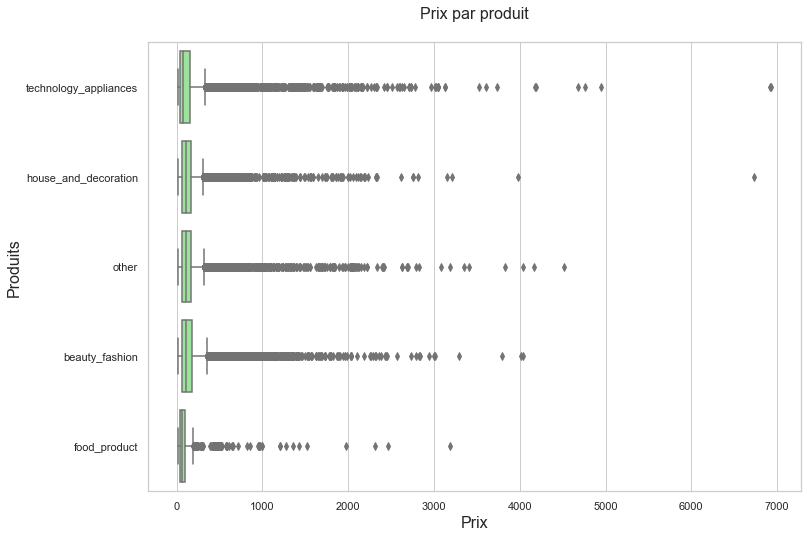

In [65]:
# Plot all the new categories according to their prices
data_prix = data.sort_values(by=["payment_value2"], ascending=False)

p = sns.boxplot(x=data_prix["payment_value2"], y=data_prix["product_category_name_english"], color = "lightgreen")
p.set_title("Prix par produit\n", fontsize=16)
p.set_xlabel ("Prix", fontsize=16)
p.set_ylabel ("Produits", fontsize=16)

In [66]:
data['product_volume_m3'] = (data['product_length_cm'] * data['product_height_cm'] * data['product_width_cm'])/1000000
data['product_weight_kg'] = (data['product_weight_g'])/1000
data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,...,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lng,seller_lat,seller_lng,product_category_name_english,product_volume_m3,product_weight_kg
0,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,96d649da0cc4ff33bb408b199d4c7dcf,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,18605,...,14940,ibitinga,SP,-22.916957,-48.441709,-21.757321,-48.829744,house_and_decoration,0.001710,0.600
1,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,...,4733,sao paulo,SP,-23.040252,-46.979782,-23.635530,-46.694031,technology_appliances,0.008000,0.100
2,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,...,80610,curitiba,PR,-23.597794,-46.643923,-25.469955,-49.289821,other,0.009576,0.967
3,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,...,1206,sao paulo,SP,-25.566904,-49.309115,-23.535864,-46.642819,technology_appliances,0.044460,8.950
4,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,...,88303,itajai,SC,-2.497993,-44.297761,-26.912574,-48.673980,technology_appliances,0.053400,10.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88626,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,...,87900,loanda,PR,-23.243402,-46.827614,-22.929384,-53.135873,house_and_decoration,0.042000,3.750
88627,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,...,14403,franca,SP,-23.089925,-46.611654,-20.553624,-47.387359,beauty_fashion,0.002400,0.200
88628,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,...,37564,borda da mata,MG,-19.870305,-44.593326,-22.262584,-46.171124,house_and_decoration,0.014157,3.050
88629,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,...,3471,sao paulo,SP,-20.220527,-50.903424,-23.565096,-46.518565,beauty_fashion,0.060000,30.000


In [67]:
data.drop(['order_approved_at', 'shipping_limit_date', 'order_delivered_carrier_date', 
           'payment_sequential', 'price', 'freight_value',
           'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_weight_g',
           'product_category_name', 'product_name_lenght','product_description_lenght', 'product_photos_qty',
           'order_id', 'product_id', 'customer_id',
           'customer_zip_code_prefix', 'customer_city', 'seller_zip_code_prefix'], 
          axis=1, inplace=True)

In [68]:
print(data.shape)
column_with_nan = data.columns[data.isnull().any()]
Nom_colonne = []
Nombre_NaN = []

for column in column_with_nan:
    Nom_colonne.append(column)
    Nombre_NaN.append(data[column].isnull().sum())

tab = pd.DataFrame(Nom_colonne, columns = ['Colonne'])
tab['Nombre_NaN'] = Nombre_NaN
print(tab)

(88631, 21)
                         Colonne  Nombre_NaN
0  order_delivered_customer_date        2019
1                   customer_lat         254
2                   customer_lng         254
3                     seller_lat         187
4                     seller_lng         187
5              product_volume_m3          13
6              product_weight_kg          13


In [69]:
# 13 NaN for product_volume and product_weight. I will delete the corresponding rows
# Idem for 'customer_lat' and 'customer_lng'

data.dropna(subset=['product_volume_m3', 'customer_lat'], inplace=True)

In [70]:
# The NaN of seller_lat and seller_long can be calculated according to the city where the seller is located.
# Let's check if for each seller there is only one city assigned to him

# Create a table with seller_id and number of cities by seller_id
seller_id = []
nombre_city = []

for i in data['seller_id'].unique():
    seller_id.append(i)
    nombre_city.append(len(data[data['seller_id']==i]['seller_city'].unique()))

df_seller = pd.DataFrame(seller_id, columns = ['seller_id'])
df_seller['nombre_city'] = nombre_city

print(df_seller)
print('The unique number of city :', df_seller['nombre_city'].unique()) # the result of 'number_city'.unique() = 1,
                                  # this means taht for each seller_id there is only one city.

                             seller_id  nombre_city
0     f7ccf836d21b2fb1de37564105216cc1            1
1     2b3e4a2a3ea8e01938cabda2a3e5cc79            1
2     c3cfdc648177fdbbbb35635a37472c53            1
3     f3c38ab652836d21de61fb8314b69182            1
4     b8bc237ba3788b23da09c0f1f3a3288c            1
...                                ...          ...
2992  c092292535a57dacd95a8765f5518f87            1
2993  71dc18fd8cbf5fd77f45dd8b427abb34            1
2994  bf0d50a6410d487dc97d2baac0a8c0be            1
2995  702835e4b785b67a084280efca355756            1
2996  5996cddab893a4652a15592fb58ab8db            1

[2997 rows x 2 columns]
The unique number of city : [1]


In [71]:
# Calculation of average longitude and latitude by seller's city
df_seller_city = data.dropna(subset=['seller_lat', 'seller_lng']).iloc[:,[-9,-5,-4]]

df_seller_city = df_seller_city.groupby('seller_city').mean()
df_seller_city = df_seller_city.rename_axis('index').reset_index().rename(columns = {'index': 'seller_city',
                                                                          'seller_lng': 'seller_lng_mean',
                                                                          'seller_lat': 'seller_lat_mean'})
df_seller_city

,seller_city,seller_lat_mean,seller_lng_mean
0,04482255,-23.012987,-43.465520
1,abadia de goias,-16.767063,-49.438089
2,afonso claudio,-20.076822,-41.123711
3,aguas claras df,-15.832414,-48.037455
4,alambari,-23.561571,-47.885101
...,...,...,...
593,volta redonda,-22.497371,-44.127572
594,votorantim,-23.543320,-47.457380
595,votuporanga,-20.416654,-49.984072
596,xanxere,-26.876415,-52.403995


In [72]:
# Merge data and df_seller on 'seller_city'
data = pd.merge(data, df_seller_city, on=['seller_city'], how='left') 

# Define a function to replace the NaN of seller_lng by seller_lng_mean
def lng_seller(x):
    if np.isnan(x['seller_lng']):
        return x['seller_lng_mean']
    else:
        return x['seller_lng']

data['seller_lng'] = data.apply(lambda x : lng_seller(x),axis=1)


# Define a function to replace the NaN of seller_lat with seller_lat_mean

def lat_seller(x):
    if np.isnan(x['seller_lat']):
        return x['seller_lat_mean']
    else:
        return x['seller_lat']

data['seller_lat'] = data.apply(lambda x : lat_seller(x),axis=1)


# Drop columns that I don't use in my analysis
data.drop(['seller_id', 'seller_city', 'seller_lng_mean', 'seller_lat_mean'], axis=1, inplace=True)

In [73]:
# Number of NaN within the columns
print(data.shape)
column_with_nan = data.columns[data.isnull().any()]
Nom_colonne = []
Nombre_NaN = []

for column in column_with_nan:
    Nom_colonne.append(column)
    Nombre_NaN.append(data[column].isnull().sum())

tab = pd.DataFrame(Nom_colonne, columns = ['Colonne'])
tab['Nombre_NaN'] = Nombre_NaN
tab

(88364, 19)


,Colonne,Nombre_NaN
0,order_delivered_customer_date,2010


In [74]:
print('Number of NaN in the column "order_delivered_customer_date" for each "order_status":')
print('- delivered:',data[data['order_status']=='delivered']['order_delivered_customer_date'].isna().sum(), 'NaN /',len(data[data['order_status']=='delivered']))
print('- canceled:',data[data['order_status']=='canceled']['order_delivered_customer_date'].isna().sum(), 'NaN /',len(data[data['order_status']=='canceled']))
print('- unavailable', data[data['order_status']=='unavailable']['order_delivered_customer_date'].isna().sum(), 'NaN /', len(data[data['order_status']=='unavailable']))
print('- approved', data[data['order_status']=='approved']['order_delivered_customer_date'].isna().sum(), 'NaN /', len(data[data['order_status']=='approved']))
print('- invoiced', data[data['order_status']=='invoiced']['order_delivered_customer_date'].isna().sum(), 'NaN /', len(data[data['order_status']=='invoiced']))
print('- processing', data[data['order_status']=='processing']['order_delivered_customer_date'].isna().sum(), 'NaN /', len(data[data['order_status']=='processing']))
print('- shipped', data[data['order_status']=='shipped']['order_delivered_customer_date'].isna().sum(), 'NaN /', len(data[data['order_status']=='shipped']))

# we can notice that except or order status 'delivered' all the other categories have only NaN in the column 'order_delivered_customer_date'
# this means that for these categories the delivery never took place.
# However the 8 NaN in the category 'delivered' will be droped, becaused it is not consistent.

Number of NaN in the column "order_delivered_customer_date" for each "order_status":
- delivered: 8 NaN / 86357
- canceled: 413 NaN / 418
- unavailable 5 NaN / 5
- approved 1 NaN / 1
- invoiced 281 NaN / 281
- processing 267 NaN / 267
- shipped 1035 NaN / 1035


In [75]:
# By droping all the 2010 NaN in the columns 'order_delivered_customer_date' and the 5 remaining canceled order
# I will continue my analysis only with the delivered order

data.dropna(subset=['order_delivered_customer_date'], inplace=True)
data = data[data['order_status']!='canceled']
                    
# from now on the analyses are done on the delivered articles only

In [76]:
from datetime import datetime, timedelta, date

data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])

def from_date_to_age(value):
    today = datetime.today()
    return (today - value).days

data['days_since_purchase'] = data['order_purchase_timestamp'].apply(lambda x: from_date_to_age(x))
data['days_since_delivery'] = data['order_delivered_customer_date'].apply(lambda x: from_date_to_age(x))
data['days_since_estimated_delivery'] = data['order_estimated_delivery_date'].apply(lambda x: from_date_to_age(x))
data

,order_item_id,customer_unique_id,customer_state,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value2,...,customer_lat,customer_lng,seller_lat,seller_lng,product_category_name_english,product_volume_m3,product_weight_kg,days_since_purchase,days_since_delivery,days_since_estimated_delivery
0,1,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,SP,delivered,2018-06-09 17:00:18,2018-06-14 17:56:26,2018-06-28,credit_card,1.0,55.79,...,-22.916957,-48.441709,-21.757321,-48.829744,house_and_decoration,0.001710,0.600,1157,1152,1139
1,1,eb803377c9315b564bdedad672039306,SP,delivered,2017-08-14 23:02:59,2017-08-16 21:59:40,2017-08-25,credit_card,3.0,64.71,...,-23.040252,-46.979782,-23.635530,-46.694031,technology_appliances,0.008000,0.100,1456,1454,1446
2,1,cd79b407828f02fdbba457111c38e4c4,SP,delivered,2017-10-23 17:07:56,2017-10-28 12:22:22,2017-11-10,credit_card,3.0,116.85,...,-23.597794,-46.643923,-25.469955,-49.289821,other,0.009576,0.967,1386,1382,1369
3,1,0da9fe112eae0c74d3ba1fe16de0988b,PR,delivered,2018-07-14 10:26:46,2018-07-23 20:31:55,2018-08-01,boleto,1.0,386.53,...,-25.566904,-49.309115,-23.535864,-46.642819,technology_appliances,0.044460,8.950,1123,1113,1105
4,1,0c9aeda10a71f369396d0c04dce13a64,MA,delivered,2018-04-23 13:57:06,2018-05-10 22:56:40,2018-05-18,boleto,1.0,343.40,...,-2.497993,-44.297761,-26.912574,-48.673980,technology_appliances,0.053400,10.150,1205,1187,1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88359,1,64b576fb70d441e8f1b2d7d446e483c5,SP,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,credit_card,3.0,218.04,...,-23.243402,-46.827614,-22.929384,-53.135873,house_and_decoration,0.042000,3.750,1648,1622,1607
88360,1,af861d436cfc08b2c2ddefd0ba074622,SP,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,credit_card,2.0,25.78,...,-23.089925,-46.611654,-20.553624,-47.387359,beauty_fashion,0.002400,0.200,1098,1092,1086
88361,1,3818d81c6709e39d06b2738a8d3a2474,MG,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,credit_card,5.0,216.87,...,-19.870305,-44.593326,-22.262584,-46.171124,house_and_decoration,0.014157,3.050,1304,1296,1282
88362,1,eb28e67c4c0b83846050ddfb8a35d051,SP,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,credit_card,3.0,259.83,...,-20.220527,-50.903424,-23.565096,-46.518565,beauty_fashion,0.060000,30.000,1567,1550,1548


In [77]:
# Calculation of three indicators related to dates
#==================================================

# Time lag between purchase and delivery (real and estimated)
data['days_purchase_to_delivery'] = data['days_since_purchase'] - data['days_since_delivery']
data['days_purchase_to_estimated_delivery'] = data['days_since_purchase'] - data['days_since_estimated_delivery']


# Time lag between estimated delivery and the real date delivery
print(data['days_purchase_to_delivery'].min())
print(data['days_purchase_to_estimated_delivery'].min()) 
                #There's no negative value

data['lag_real_estimated_delivery'] = data['days_purchase_to_estimated_delivery'] - data['days_purchase_to_delivery']
            # >0 delivered before the estimated date
            # <0 delivered after the estimated date
            # =0 deliverd the same day as the estimated date


# The newness of the customers: number of days of the oldest customer - number of days since the order 
data['client_novelty_scale'] = data['days_since_purchase'].max() - data['days_since_purchase'] 
                                                        # A newer client will have a higher value


# Drop columns that I will not use in the analysis
data.drop(['days_since_purchase', 'days_since_delivery', 
           'days_since_estimated_delivery', 'days_purchase_to_estimated_delivery',
          'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1, inplace=True)

1
2


In [163]:
data['client_order_frequency'] = data['customer_unique_id'].map(data['customer_unique_id'].value_counts())
data[data['client_order_frequency']>1] # nearly 5000 clients have ordered more than once

,order_item_id,customer_unique_id,customer_state,order_status,payment_type,payment_installments,payment_value2,review_score,seller_state,customer_lat,customer_lng,seller_lat,seller_lng,product_category_name_english,product_volume_m3,product_weight_kg,days_purchase_to_delivery,lag_real_estimated_delivery,client_novelty_scale,client_order_frequency
13,1,2b19910e856b2ba3e7257e63a093a3df,RJ,delivered,credit_card,10.0,123.60,4.0,RJ,-22.985312,-43.204143,-22.832903,-43.412303,beauty_fashion,0.096000,16.050,3,11,358,2
37,1,71d2dbb6d2f52d568ca9d69c815a4331,SP,delivered,credit_card,7.0,76.85,5.0,SP,-23.559038,-46.649459,-23.548910,-46.422925,beauty_fashion,0.008000,0.700,8,12,177,2
98,1,c130bf40aa6d3bdb444b04a8d78adf5a,SP,delivered,credit_card,1.0,56.24,5.0,SP,-23.572993,-46.747126,-23.425556,-46.525292,technology_appliances,0.002304,0.500,4,9,241,2
105,1,acc4424c209233de519e034152f30304,RJ,delivered,credit_card,2.0,161.86,5.0,PR,-22.896408,-43.577510,-23.433450,-51.866703,other,0.002304,0.125,16,12,507,2
107,1,19c60787f1a478ec7345d03bc4298398,DF,delivered,boleto,1.0,153.63,3.0,RS,-15.781852,-47.934055,-28.290553,-54.262511,other,0.001836,0.400,26,2,416,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88279,1,3725c5b8c1cf5ee69158f66922a862c4,DF,delivered,credit_card,10.0,134.28,5.0,GO,-15.836025,-47.875670,-16.664457,-49.244693,technology_appliances,0.013832,0.700,9,1,685,2
88286,1,d56ded4569dd9821b2f83710a56afbde,SP,delivered,credit_card,8.0,99.11,5.0,SP,-23.638227,-46.610196,-21.757321,-48.829744,house_and_decoration,0.023625,1.300,12,8,318,2
88318,1,87ae4c644c15d9c6b6f826dfec33b340,RJ,delivered,credit_card,4.0,45.09,5.0,SP,-22.518974,-44.136149,-23.472995,-46.647429,house_and_decoration,0.004576,0.700,10,12,316,2
88329,1,98758d88bf4b8eef1372ddee45d63178,AL,delivered,credit_card,10.0,853.39,1.0,MG,-9.784323,-36.349941,-20.077863,-44.576134,technology_appliances,0.014168,3.407,46,-4,186,2


Text(0, 0.5, 'Latitude')

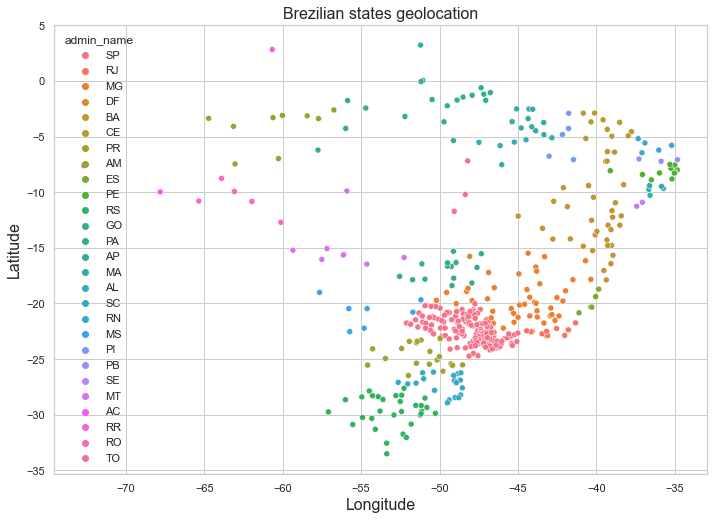

In [164]:
# Verify the geolocation of all the sellers and customers.
# Then calculate the distance in km between each customer and its corresponding seller.

# Download brezilian states geolocation from this site (https://simplemaps.com/data/br-cities)
brazil_df = pd.read_csv('br.csv', low_memory=False)

# Change the states name to the official abreviation according to this site (https://brazil-help.com/brazilian_states.htm)
brazil_df['admin_name'] = brazil_df['admin_name'].replace(['São Paulo', 'Rio de Janeiro', 'Minas Gerais', 
                                                           'Distrito Federal', 'Bahia', 'Ceará',
                                                           'Paraná', 'Amazonas', 'Espírito Santo',
                                                           'Pernambuco', 'Rio Grande do Sul', 'Goiás',
                                                           'Pará', 'Amapá', 'Maranhão',
                                                           'Alagoas', 'Santa Catarina', 'Rio Grande do Norte',
                                                           'Mato Grosso do Sul', 'Piauí', 'Paraíba',
                                                           'Sergipe', 'Mato Grosso', 'Acre',
                                                           'Roraima', 'Rondônia', 'Tocantins'], 
                                                          ['SP', 'RJ', 'MG',
                                                           'DF', 'BA', 'CE',
                                                           'PR', 'AM', 'ES',
                                                           'PE', 'RS', 'GO',
                                                           'PA', 'AP', 'MA',
                                                           'AL', 'SC', 'RN',
                                                           'MS', 'PI', 'PB',
                                                           'SE', 'MT', 'AC',
                                                           'RR', 'RO', 'TO'])

# plot brazilian cities according to their lng & lat
q = sns.scatterplot(x=brazil_df['lng'], y=brazil_df['lat'], hue=brazil_df['admin_name'])
q.set_title('Brezilian states geolocation', fontsize=16)
q.set_xlabel ('Longitude', fontsize=16)
q.set_ylabel ('Latitude', fontsize=16)

Text(0, 0.5, 'Latitude')

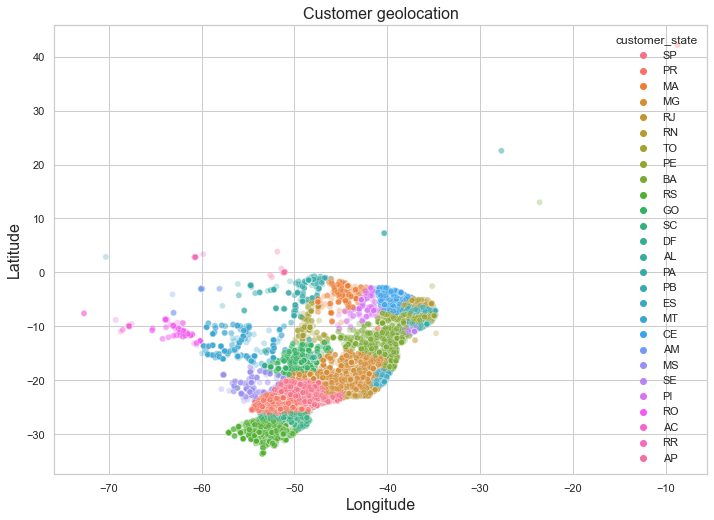

In [165]:
# Plot customers geolocation according to their state
q = sns.scatterplot(x=data['customer_lng'], y=data['customer_lat'], 
                    hue=data['customer_state'], alpha=0.3)
q.set_title('Customer geolocation', fontsize=16)
q.set_xlabel ('Longitude', fontsize=16)
q.set_ylabel ('Latitude', fontsize=16) 
# There are some far points on the right of the figure. 
# These points will be considered as outliers.

Text(0, 0.5, 'Latitude')

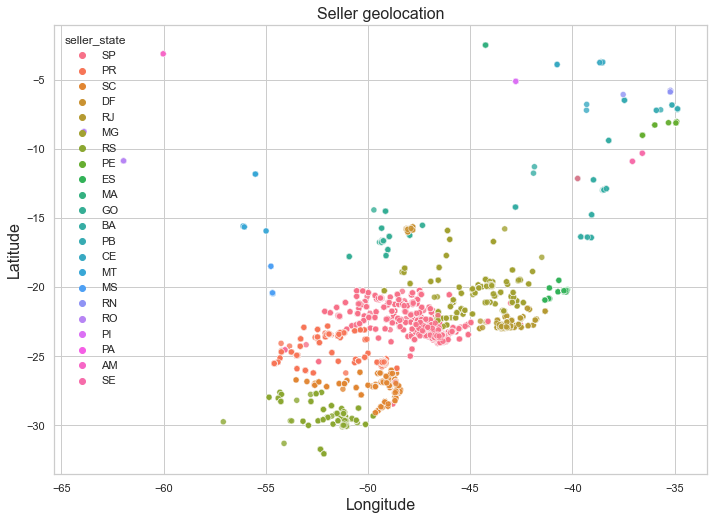

In [166]:
# Plot seller geolocation according to their state
q = sns.scatterplot(x=data['seller_lng'], y=data['seller_lat'], hue=data['seller_state'], alpha=0.8)


q.set_title('Seller geolocation', fontsize=16)
q.set_xlabel ('Longitude', fontsize=16)
q.set_ylabel ('Latitude', fontsize=16) 

Text(0, 0.5, 'Latitude')

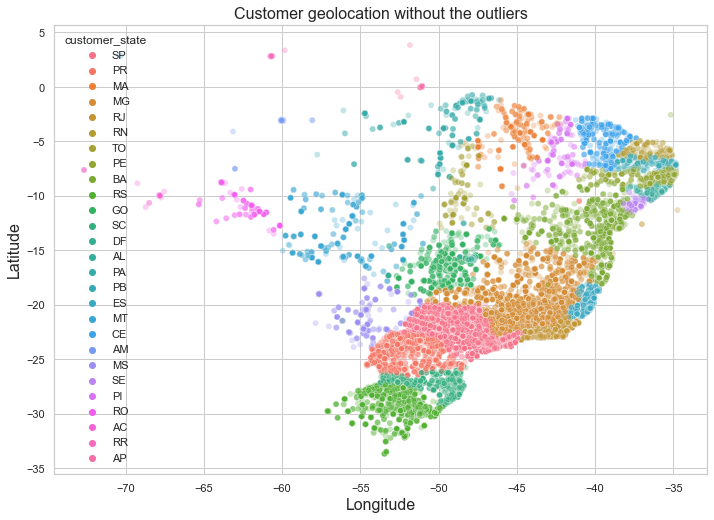

In [167]:
#It seems that the map (customer geolocation) present some outliers.
# The extreme points on this map will be deleted
data = data[(data['customer_lng']<=-32) & (data['customer_lat']<5)]

q = sns.scatterplot(x=data['customer_lng'], y=data['customer_lat'], 
                    hue=data['customer_state'], alpha=0.3)
q.set_title("Customer geolocation without the outliers", fontsize=16)
q.set_xlabel ("Longitude", fontsize=16)
q.set_ylabel ("Latitude", fontsize=16) 

In [168]:
# Calculate the distance between each customer and its corresponding seller

# Define a function
def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371 # radius of the earth
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
    return np.round(res, 2)

# Calculate the distance
distances_km = []
for row in data.itertuples(index=False):
    distances_km.append(
       haversine_distance(row.seller_lat, row.seller_lng, row.customer_lat, row.customer_lng)
   )

data['distance_from_seller'] = distances_km #Add the calculated distance in my dataset

# Drop columns that I no longer use in the analyses
data = data.drop(['customer_lat', 'customer_lng', 'seller_lat', 
           'seller_lng', 'customer_state', 'seller_state', 
           'order_status'], axis=1)

<ipython-input-168-30c348ce790e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance_from_seller'] = distances_km #Add the calculated distance in my dataset


In [169]:
# Rename some columns
data = data.rename(columns = {'order_item_id': 'number_of_items', 
                       'customer_unique_id': 'customer_id',
                       'payment_value2': 'payment_value',
                       'product_category_name_english': 'product_category',
                       'client_order_frequency': 'order_frequency'})

In [171]:
# Quantitative variable
print(len(data['customer_id'].unique()))
data_numeric = data.groupby('customer_id').mean()
data_numeric = data_numeric.rename_axis('index').reset_index().rename(columns = {'index': 'customer_id'})
data_numeric

83952


,customer_id,number_of_items,payment_installments,payment_value,review_score,product_volume_m3,product_weight_kg,days_purchase_to_delivery,lag_real_estimated_delivery,client_novelty_scale,order_frequency,distance_from_seller
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,8.0,141.90,5.0,0.007616,1.500,7.0,4.0,584.0,1.0,110.57
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,1.0,27.19,4.0,0.005148,0.375,4.0,4.0,581.0,1.0,22.17
2,0000f46a3911fa3c0805444483337064,1.0,8.0,86.22,3.0,0.043750,1.500,25.0,2.0,159.0,1.0,516.94
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,4.0,43.62,4.0,0.001045,0.150,20.0,11.0,375.0,1.0,2481.29
4,0004aac84e0df4da2b147fca70cf8255,1.0,6.0,196.89,5.0,0.000528,6.050,13.0,7.0,408.0,1.0,154.51
...,...,...,...,...,...,...,...,...,...,...,...,...
83947,fffbf87b7a1a6fa8b03f081c5f51a201,1.0,2.0,167.32,5.0,0.000704,0.350,19.0,13.0,451.0,1.0,2368.23
83948,fffea47cd6d3cc0a88bd621562a9d061,1.0,1.0,84.58,4.0,0.032076,1.720,30.0,2.0,434.0,1.0,1527.20
83949,ffff371b4d645b6ecea244b27531430a,1.0,1.0,112.46,5.0,0.003315,0.600,15.0,30.0,127.0,1.0,1526.12
83950,ffff5962728ec6157033ef9805bacc48,1.0,5.0,133.69,5.0,0.004480,0.444,12.0,14.0,576.0,1.0,637.86


In [172]:
# Object variables
mylist = list(data.select_dtypes(include=['object']).columns)[1:] #[1:] to exclude the first one wich is the 'customer_id'
print(mylist)

# Groupby 'customer_id' for object columns by keeping the most frequent observation

from scipy.stats import mode

data_payment_type = data.groupby('customer_id').payment_type.agg(lambda x: mode(x).mode)
data_payment_type = pd.DataFrame(data_payment_type).rename_axis(
                        'index').reset_index().rename(columns = {'index': 'customer_id'})

data_product_category = data.groupby('customer_id').product_category.agg(lambda x: mode(x).mode)
data_product_category = pd.DataFrame(data_product_category).rename_axis(
                        'index').reset_index().rename(columns = {'index': 'customer_id'})

['payment_type', 'product_category']


In [173]:
# Merge the 3 dataframe in one dataframe --> mydata
from functools import reduce

dfs = [data_numeric, data_payment_type, data_product_category]
mydata = reduce(lambda left, right: pd.merge(left, right, on='customer_id'), dfs)
mydata

,customer_id,number_of_items,payment_installments,payment_value,review_score,product_volume_m3,product_weight_kg,days_purchase_to_delivery,lag_real_estimated_delivery,client_novelty_scale,order_frequency,distance_from_seller,payment_type,product_category
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,8.0,141.90,5.0,0.007616,1.500,7.0,4.0,584.0,1.0,110.57,credit_card,house_and_decoration
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,1.0,27.19,4.0,0.005148,0.375,4.0,4.0,581.0,1.0,22.17,credit_card,beauty_fashion
2,0000f46a3911fa3c0805444483337064,1.0,8.0,86.22,3.0,0.043750,1.500,25.0,2.0,159.0,1.0,516.94,credit_card,other
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,4.0,43.62,4.0,0.001045,0.150,20.0,11.0,375.0,1.0,2481.29,credit_card,technology_appliances
4,0004aac84e0df4da2b147fca70cf8255,1.0,6.0,196.89,5.0,0.000528,6.050,13.0,7.0,408.0,1.0,154.51,credit_card,technology_appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83947,fffbf87b7a1a6fa8b03f081c5f51a201,1.0,2.0,167.32,5.0,0.000704,0.350,19.0,13.0,451.0,1.0,2368.23,credit_card,other
83948,fffea47cd6d3cc0a88bd621562a9d061,1.0,1.0,84.58,4.0,0.032076,1.720,30.0,2.0,434.0,1.0,1527.20,credit_card,beauty_fashion
83949,ffff371b4d645b6ecea244b27531430a,1.0,1.0,112.46,5.0,0.003315,0.600,15.0,30.0,127.0,1.0,1526.12,credit_card,technology_appliances
83950,ffff5962728ec6157033ef9805bacc48,1.0,5.0,133.69,5.0,0.004480,0.444,12.0,14.0,576.0,1.0,637.86,credit_card,beauty_fashion


In [174]:
# Save the dataset with categorical variables for the Segmentation with K-prototype Cluster Algorithm
mydata.to_csv("mydata_with_category.csv", index=False)

# Transform categorical variables into binary variables

In [175]:
# group together the categories 'credit_card', debit_card' & 'boleto' into one category 'client_account'
print(mydata['payment_type'].unique())

# Transform into binary variables
data_payment_type = pd.get_dummies(mydata.payment_type, prefix='payment_type')

# merge both tables
mydata = mydata.join(data_payment_type)

# drop 'payment type'
mydata.drop(['payment_type'], axis=1, inplace=True)

# verify if the sum of order_status columns is 1
df = mydata.iloc[:,-4:]
df['sum'] = df.sum(axis=1)
print('Les valeurs unique de la colonne sum:',df['sum'].unique())

['credit_card' 'boleto' 'voucher' 'debit_card']
Les valeurs unique de la colonne sum: [1]


In [176]:
data_product_category = pd.get_dummies(mydata.product_category, prefix='product_category')

# merge both tables
mydata = mydata.join(data_product_category)


# verify if the sum of order_status columns is 1
df = mydata.iloc[:,-5:]
df['sum'] = df.sum(axis=1)
print('Les valeurs unique de la colonne sum:',df['sum'].unique())


# drop 'product_category' and 'product_category_Unknown'
mydata.drop(['product_category'], axis=1, inplace=True)

Les valeurs unique de la colonne sum: [1]


In [177]:
mydata

,customer_id,number_of_items,payment_installments,payment_value,review_score,product_volume_m3,product_weight_kg,days_purchase_to_delivery,lag_real_estimated_delivery,client_novelty_scale,...,distance_from_seller,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,product_category_beauty_fashion,product_category_food_product,product_category_house_and_decoration,product_category_other,product_category_technology_appliances
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,8.0,141.90,5.0,0.007616,1.500,7.0,4.0,584.0,...,110.57,0,1,0,0,0,0,1,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,1.0,27.19,4.0,0.005148,0.375,4.0,4.0,581.0,...,22.17,0,1,0,0,1,0,0,0,0
2,0000f46a3911fa3c0805444483337064,1.0,8.0,86.22,3.0,0.043750,1.500,25.0,2.0,159.0,...,516.94,0,1,0,0,0,0,0,1,0
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,4.0,43.62,4.0,0.001045,0.150,20.0,11.0,375.0,...,2481.29,0,1,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,1.0,6.0,196.89,5.0,0.000528,6.050,13.0,7.0,408.0,...,154.51,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83947,fffbf87b7a1a6fa8b03f081c5f51a201,1.0,2.0,167.32,5.0,0.000704,0.350,19.0,13.0,451.0,...,2368.23,0,1,0,0,0,0,0,1,0
83948,fffea47cd6d3cc0a88bd621562a9d061,1.0,1.0,84.58,4.0,0.032076,1.720,30.0,2.0,434.0,...,1527.20,0,1,0,0,1,0,0,0,0
83949,ffff371b4d645b6ecea244b27531430a,1.0,1.0,112.46,5.0,0.003315,0.600,15.0,30.0,127.0,...,1526.12,0,1,0,0,0,0,0,0,1
83950,ffff5962728ec6157033ef9805bacc48,1.0,5.0,133.69,5.0,0.004480,0.444,12.0,14.0,576.0,...,637.86,0,1,0,0,1,0,0,0,0


In [178]:
# Save the dataset with categorical variables as binary varaible for K-means and DBSCAN
mydata.to_csv("mydata_with_binary.csv", index=False)